#MNIST

##Preprocess

11493376/11490434 [==============================] - 0s 0us/step


(<matplotlib.image.AxesImage at 0x7f8e2dd37cc0>, 9)

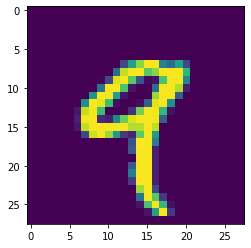

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape
import matplotlib.pyplot as plt
plt.imshow(x_train[4]), y_train[4]

In [3]:
# import numpy as np
# x_train[4] = np.where(x_train[4] > 0, 1, 255)
# import matplotlib.pyplot as plt
# plt.imshow(x_train[4])
# print(y_train[4])
# x_train = np.where(x_train > 0, 1, 255)

In [4]:
# x_train[4]

In [5]:
print(y_train[:3], y_test[:3])
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_train[:3], y_test[:3]

[5 0 4] [7 2 1]


(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [6]:
print(x_train.shape, x_test.shape)
x_train.shape, x_test.shape

(60000, 28, 28) (10000, 28, 28)


((60000, 28, 28), (10000, 28, 28))

##Normal

In [7]:
model = keras.Sequential()
# model.add(layers.Input(shape=784))
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(8, activation='sigmoid')) 
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model.summary()

In [8]:
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.3, verbose=0)  # Try epochs=1000

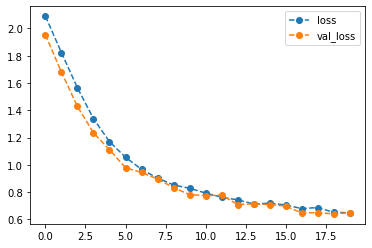

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'o--', label='loss')
plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
# plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
# plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

##layer wide

In [10]:
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

model = tf.keras.Sequential()
model.add(layers.Input(shape=784))
model.add(layers.Dense(128, activation='sigmoid')) 
model.add(layers.Dropout(0.2))    # x_train과 x_test accuracy 차이 클 경우 적용
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model.summary()
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.3, verbose=0)  # Try epochs=1000

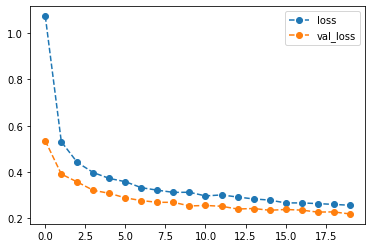

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'o--', label='loss')
plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
# plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
# plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

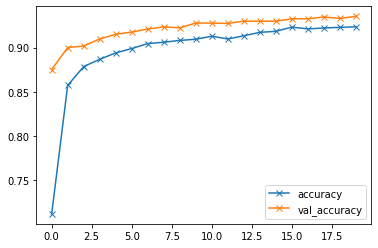

In [12]:
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

In [13]:
eval = model.evaluate(x_test, y_test, batch_size=128)
len(eval), type(eval)

79/79 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9388


(2, list)

In [14]:
y_pred = model.predict(x_test)

import numpy as np
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_pred_class))
confusion_matrix(y_test_class, y_pred_class)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.91      0.94      0.93      1032
           3       0.92      0.93      0.93      1010
           4       0.92      0.94      0.93       982
           5       0.94      0.90      0.92       892
           6       0.94      0.95      0.94       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.92      0.93       974
           9       0.93      0.90      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



array([[ 961,    0,    2,    1,    0,    3,   11,    1,    1,    0],
       [   0, 1117,    4,    3,    0,    1,    3,    2,    5,    0],
       [  11,    1,  970,   10,   10,    1,    7,    5,   15,    2],
       [   1,    0,   24,  939,    0,   18,    1,   12,   12,    3],
       [   1,    2,    5,    0,  924,    1,   12,    4,    3,   30],
       [  12,    1,    7,   26,    4,  807,   15,    3,   10,    7],
       [  12,    2,    5,    1,   11,   13,  908,    2,    4,    0],
       [   3,    8,   32,    3,    6,    0,    0,  960,    1,   15],
       [   5,    4,   12,   19,    5,    7,   10,   10,  893,    9],
       [   8,    6,    1,   14,   43,    7,    1,   14,    6,  909]])

##Layer Deep & vanishing gradient problem

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [16]:
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

model = tf.keras.Sequential()
model.add(layers.Input(shape=784))
model.add(layers.Dense(8, activation='sigmoid')) 
model.add(layers.Dense(8, activation='sigmoid')) 
model.add(layers.Dense(8, activation='sigmoid')) 
model.add(layers.Dense(8, activation='sigmoid')) 

model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model.summary()
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.3, verbose=0)  # Try epochs=1000

In [17]:
# hist.epoch

### Vanishing Problem

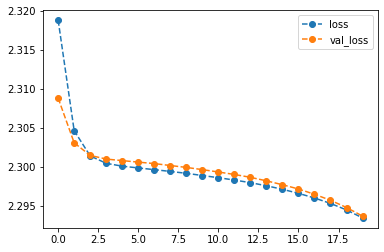

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'o--', label='loss')
plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
plt.legend()

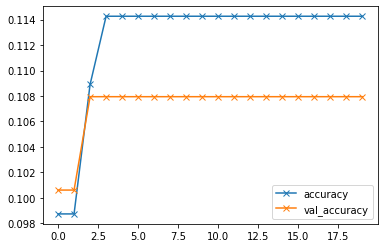

In [19]:
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

## Solve Vanishing Problem

In [20]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=784))
model.add(layers.Dense(8, activation='relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu')) 
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model.summary()
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.3, verbose=0)  # Try epochs=1000

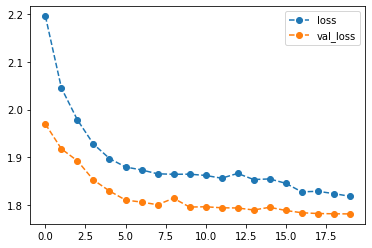

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'o--', label='loss')
plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
plt.legend()

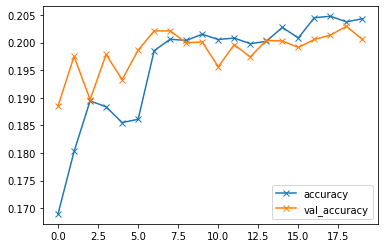

In [22]:
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

##Depend on Epochs count

In [23]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=784))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD', metrics=['accuracy'])

hist_list = []
accuracies = []
losses = []
# epoch_count = [2,3,4]
epoch_count = [10,20,30,40,50,60]
for epoch in epoch_count:
  hist = model.fit(x_train, y_train, epochs=epoch, validation_split=0.3, verbose=0)
  hist_list.append(hist)
  accuracies.append(hist.history['accuracy'][epoch-1])
  losses.append(hist.history['loss'][epoch-1])
  # model_idx = epoch_count.index(epoch)
  # hist_list.append(model.fit(x_train, y_train, epochs=epoch, validation_split=0.3, verbose=0))
  # accuracies.append(hist_list[model_idx].history['accuracy'][epoch-1])
  # losses.append(hist_list[model_idx].history['loss'][epoch-1])

1313/1313 [==============================] - 5s 4ms/step - loss: 0.4353 - accuracy: 0.8767 - val_loss: 0.4810 - val_accuracy: 0.8692
Epoch 46/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4340 - accuracy: 0.8792 - val_loss: 0.4375 - val_accuracy: 0.8808
Epoch 47/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4095 - accuracy: 0.8893 - val_loss: 0.4350 - val_accuracy: 0.8792
Epoch 48/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4189 - accuracy: 0.8877 - val_loss: 0.4550 - val_accuracy: 0.8732
Epoch 49/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4401 - accuracy: 0.8811 - val_loss: 0.4442 - val_accuracy: 0.8782
Epoch 50/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4179 - accuracy: 0.8849 - val_loss: 0.4354 - val_accuracy: 0.8753
Epoch 51/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4214 - accuracy: 0.8836 - val_loss: 0.4345 - val_accuracy: 0.88

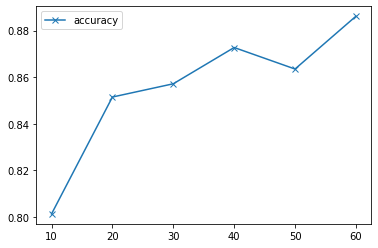

In [24]:
import matplotlib.pyplot as plt
plt.plot(epoch_count,accuracies, 'x-', label='accuracy')
plt.legend()

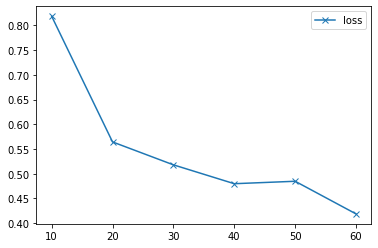

In [25]:
import matplotlib.pyplot as plt
plt.plot(epoch_count,losses, 'x-', label='loss')
plt.legend()

##EarlyStopping

###Overfit

In [26]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=784))
model.add(layers.Dense(128, activation='sigmoid')) 
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model.summary()
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3, verbose=0)  # Try epochs=1000

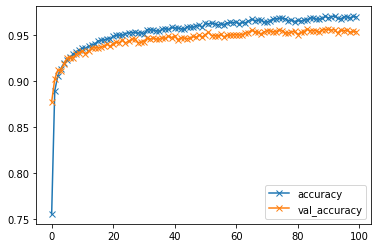

In [27]:
import matplotlib.pyplot as plt
# plt.plot(hist.history['loss'], 'x--', label='loss')
# plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=784))
model.add(layers.Dense(128, activation='sigmoid')) 
model.add(layers.Dense(10, activation='sigmoid'))

early_stopp = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model.summary()
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3, verbose=1, callbacks=[early_stopp])  # Try epochs=1000

In [29]:
hist.epoch[-1]

26

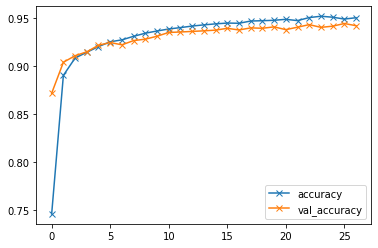

In [30]:
import matplotlib.pyplot as plt
# plt.plot(hist.history['loss'], 'o--', label='loss')
# plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

##kernel_regularizer

In [31]:
dense_kernel_regularizer = tf.keras.regularizers.l2(0.00001)
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(8, activation='sigmoid', kernel_regularizer=dense_kernel_regularizer))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='sigmoid', kernel_regularizer=dense_kernel_regularizer))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='sigmoid', kernel_regularizer=dense_kernel_regularizer))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=['accuracy','mean_squared_error'])
hist = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_split=0.2,verbose=0)

In [32]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [33]:
len(model.layers)

7

In [34]:
len(model.weights), type(model.weights), model.weights[2].shape

(8, list, TensorShape([8, 8]))

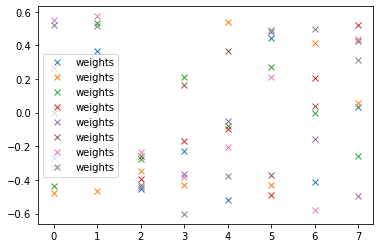

In [35]:
# 0.01
import matplotlib.pyplot as plt
plt.plot(model.weights[2].numpy(), 'x', label='weights')
plt.legend()

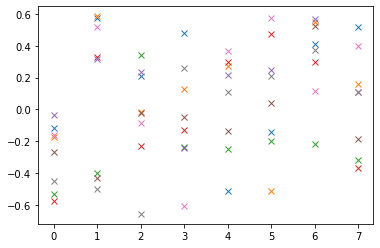

In [36]:
# 0.1
plt.plot(model.weights[4].numpy(), 'x', label='weights')
# plt.plot(model.weights[4].numpy(), 'x', label='weights')

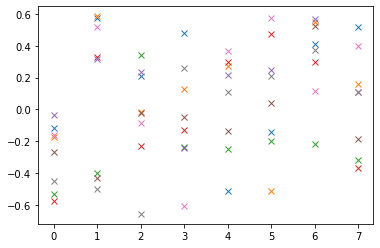

In [37]:
plt.plot(model.weights[4].numpy(), 'x', label='weights')
# plt.legend()

## ModelCheckpoint

In [ ]:
dense_kernel_regularizer = tf.keras.regularizers.l2(0.001)
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=dense_kernel_regularizer))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

import os
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
checkpoint_path = "./training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=['accuracy','mean_squared_error'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2,verbose=0, callbacks=[checkpoint_callback])


Epoch 00001: saving model to ./training/cp.ckpt

Epoch 00002: saving model to ./training/cp.ckpt

Epoch 00003: saving model to ./training/cp.ckpt

Epoch 00004: saving model to ./training/cp.ckpt

Epoch 00005: saving model to ./training/cp.ckpt

Epoch 00006: saving model to ./training/cp.ckpt

Epoch 00007: saving model to ./training/cp.ckpt

Epoch 00008: saving model to ./training/cp.ckpt

Epoch 00009: saving model to ./training/cp.ckpt

Epoch 00010: saving model to ./training/cp.ckpt

Epoch 00011: saving model to ./training/cp.ckpt

Epoch 00012: saving model to ./training/cp.ckpt

Epoch 00013: saving model to ./training/cp.ckpt

Epoch 00014: saving model to ./training/cp.ckpt

Epoch 00015: saving model to ./training/cp.ckpt

Epoch 00016: saving model to ./training/cp.ckpt

Epoch 00017: saving model to ./training/cp.ckpt

Epoch 00018: saving model to ./training/cp.ckpt

Epoch 00019: saving model to ./training/cp.ckpt

Epoch 00020: saving model to ./training/cp.ckpt

Epoch 00021: saving

In [ ]:
load_checkpoint = model.load_weights(checkpoint_path)

In [ ]:
load_checkpoint.expect_partial()

##model save

In [ ]:
model.save('./save_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('./save_model.h5')
new_model.summary()
new_model.evaluate(x_test, y_test, verbose=2)